In [94]:
import pyspark as ps    # for the pyspark suite
from pyspark.sql.functions import *
from matplotlib.pyplot import *
import pandas as pd

In [2]:
spark = (ps.sql.SparkSession
         .builder
         .master('local[4]')
         .appName('capstone')
         .getOrCreate()
        )
sc = spark.sparkContext

In [3]:
spark

In [5]:
spark.sql("Create Database Imdb").show()

++
||
++
++



In [6]:
df_movie_raw = spark.read.csv('data/title.basics.tsv',
                         header=True,       # use headers or not
                         quote='"',         # char for quotes
                         sep="\t",           # char for separation
                         inferSchema=True)  # do we infer schema or not ?

In [7]:
df_movie_raw.createOrReplaceTempView('Imdb_All')


In [8]:
spark.sql("Desc Imdb_All").show()

+--------------+---------+-------+
|      col_name|data_type|comment|
+--------------+---------+-------+
|        tconst|   string|   null|
|     titleType|   string|   null|
|  primaryTitle|   string|   null|
| originalTitle|   string|   null|
|       isAdult|      int|   null|
|     startYear|   string|   null|
|       endYear|   string|   null|
|runtimeMinutes|   string|   null|
|        genres|   string|   null|
+--------------+---------+-------+



In [9]:
# Type of titles in Imdb
spark.sql("Select distinct(m.titleType) from Imdb_All m").show()

+------------+
|   titleType|
+------------+
|    tvSeries|
|tvMiniSeries|
|     tvMovie|
|   tvEpisode|
|       movie|
|   tvSpecial|
|       video|
|   videoGame|
|     tvShort|
|       short|
+------------+



In [10]:
df_ratings_raw = spark.read.csv('data/title.ratings.tsv',
                         header=True,       # use headers or not
                         quote='"',         # char for quotes
                         sep="\t",           # char for separation
                         inferSchema=True)  # do we infer schema or not ?

In [11]:
df_ratings_raw.createOrReplaceTempView('Ratings')

In [12]:
spark.sql("Desc Ratings").show()

+-------------+---------+-------+
|     col_name|data_type|comment|
+-------------+---------+-------+
|       tconst|   string|   null|
|averageRating|   double|   null|
|     numVotes|      int|   null|
+-------------+---------+-------+



In [14]:
df_principal_crew_raw = spark.read.csv('data/title.principals.tsv',
                         header=True,       # use headers or not
                         quote='"',         # char for quotes
                         sep="\t",           # char for separation
                         inferSchema=True)  # do we infer schema or not ?

In [15]:
df_principal_crew_raw.createOrReplaceTempView('Principal_Crew')

In [16]:
spark.sql("Desc Principal_Crew").show()

+----------+---------+-------+
|  col_name|data_type|comment|
+----------+---------+-------+
|    tconst|   string|   null|
|  ordering|      int|   null|
|    nconst|   string|   null|
|  category|   string|   null|
|       job|   string|   null|
|characters|   string|   null|
+----------+---------+-------+



In [17]:
spark.sql("Select distinct(category) from Principal_Crew").show()

+-------------------+
|           category|
+-------------------+
|            actress|
|           producer|
|             writer|
|           composer|
|           director|
|               self|
|              actor|
|             editor|
|    cinematographer|
|      archive_sound|
|production_designer|
|    archive_footage|
+-------------------+



In [18]:
df_crew_names = spark.read.csv('data/name.basics.tsv',
                         header=True,       # use headers or not
                         quote='"',         # char for quotes
                         sep="\t",           # char for separation
                         inferSchema=True)  # do we infer schema or not ?

In [19]:
df_crew_names.createOrReplaceTempView('Crew_names')


In [20]:
spark.sql("Desc Crew_names").show()

+-----------------+---------+-------+
|         col_name|data_type|comment|
+-----------------+---------+-------+
|           nconst|   string|   null|
|      primaryName|   string|   null|
|        birthYear|   string|   null|
|        deathYear|   string|   null|
|primaryProfession|   string|   null|
|   knownForTitles|   string|   null|
+-----------------+---------+-------+



In [25]:
spark.sql("Show tables").show()

+--------+--------------+-----------+
|database|     tableName|isTemporary|
+--------+--------------+-----------+
|        |    crew_names|       true|
|        |      imdb_all|       true|
|        |        movies|       true|
|        |principal_crew|       true|
|        |       ratings|       true|
+--------+--------------+-----------+



In [126]:
# Filtering to movie and tvMovie type
df_movies = spark.sql("select * from Imdb_All m where m.titleType in ('tvMovie','movie')")

In [23]:
df_movies.createOrReplaceTempView('Movies')

In [26]:
#Filtering crew to writers only, writers have books the movie was adapted from
df_writers = spark.sql("Select tconst, nconst, category, job from Principal_Crew where category = 'writer'")

In [27]:
df_writers.createOrReplaceTempView('Writers')

In [28]:
spark.sql("Desc Writers").show()

+--------+---------+-------+
|col_name|data_type|comment|
+--------+---------+-------+
|  tconst|   string|   null|
|  nconst|   string|   null|
|category|   string|   null|
|     job|   string|   null|
+--------+---------+-------+



In [29]:
spark.sql("Desc Movies").show()

+--------------+---------+-------+
|      col_name|data_type|comment|
+--------------+---------+-------+
|        tconst|   string|   null|
|     titleType|   string|   null|
|  primaryTitle|   string|   null|
| originalTitle|   string|   null|
|       isAdult|      int|   null|
|     startYear|   string|   null|
|       endYear|   string|   null|
|runtimeMinutes|   string|   null|
|        genres|   string|   null|
+--------------+---------+-------+



In [30]:
spark.sql("Desc ratings").show()

+-------------+---------+-------+
|     col_name|data_type|comment|
+-------------+---------+-------+
|       tconst|   string|   null|
|averageRating|   double|   null|
|     numVotes|      int|   null|
+-------------+---------+-------+



In [31]:
# Joining movies and ratings table
df_movies_ratings = spark.sql("select m.tconst as movie_id, m.titleType as title_type, m.primaryTitle as primary_title, m.originalTitle as original_title, m.startYear as year, m.runtimeMinutes as runtime_mins, m.genres as genres, r.averageRating as avg_ratings, r.numVotes as votes from Movies m inner join ratings r on m.tconst = r.tconst")

In [33]:
df_movies_ratings.createOrReplaceTempView('Movies_and_Ratings')

In [34]:
spark.sql("Desc Movies_and_Ratings").show()

+--------------+---------+-------+
|      col_name|data_type|comment|
+--------------+---------+-------+
|      movie_id|   string|   null|
|    title_type|   string|   null|
| primary_title|   string|   null|
|original_title|   string|   null|
|          year|   string|   null|
|  runtime_mins|   string|   null|
|        genres|   string|   null|
|   avg_ratings|   double|   null|
|         votes|      int|   null|
+--------------+---------+-------+



In [35]:
# Joining writers and crew info table
df_writer_info = spark.sql("select w.tconst as movie_id, w.nconst as crew_id, w.category as category, c.primaryName as name, c.birthYear as birth_year, c.primaryProfession as profession, w.job as job_desc from Writers w inner join crew_names c on w.nconst = c.nconst")

In [36]:
df_writer_info.printSchema()

root
 |-- movie_id: string (nullable = true)
 |-- crew_id: string (nullable = true)
 |-- category: string (nullable = true)
 |-- name: string (nullable = true)
 |-- birth_year: string (nullable = true)
 |-- profession: string (nullable = true)
 |-- job_desc: string (nullable = true)



In [37]:
df_writer_info.createOrReplaceTempView("Writer_Info")

In [38]:
spark.sql('Show tables').show()

+--------+------------------+-----------+
|database|         tableName|isTemporary|
+--------+------------------+-----------+
|        |        crew_names|       true|
|        |          imdb_all|       true|
|        |            movies|       true|
|        |movies_and_ratings|       true|
|        |    principal_crew|       true|
|        |           ratings|       true|
|        |       writer_info|       true|
|        |           writers|       true|
+--------+------------------+-----------+



In [39]:
spark.sql("select max(year), min(year) from movies_and_ratings where year > 0").show()

+---------+---------+
|max(year)|min(year)|
+---------+---------+
|     2020|     1894|
+---------+---------+



In [40]:
spark.sql("Desc movies_and_ratings").show()

+--------------+---------+-------+
|      col_name|data_type|comment|
+--------------+---------+-------+
|      movie_id|   string|   null|
|    title_type|   string|   null|
| primary_title|   string|   null|
|original_title|   string|   null|
|          year|   string|   null|
|  runtime_mins|   string|   null|
|        genres|   string|   null|
|   avg_ratings|   double|   null|
|         votes|      int|   null|
+--------------+---------+-------+



In [132]:
spark.sql("Desc writer_info").show()

+----------+---------+-------+
|  col_name|data_type|comment|
+----------+---------+-------+
|  movie_id|   string|   null|
|   crew_id|   string|   null|
|  category|   string|   null|
|      name|   string|   null|
|birth_year|   string|   null|
|profession|   string|   null|
|  job_desc|   string|   null|
+----------+---------+-------+



In [137]:
spark.sql("select max(votes), min(votes) from movies_and_ratings").show()

+----------+----------+
|max(votes)|min(votes)|
+----------+----------+
|   2210915|         5|
+----------+----------+



In [147]:
spark.sql("select * from movies_and_ratings where movie_id = 'tt0810922'").show()

+---------+----------+--------------------+--------------------+----+------------+--------------------+-----------+-----+
| movie_id|title_type|       primary_title|      original_title|year|runtime_mins|              genres|avg_ratings|votes|
+---------+----------+--------------------+--------------------+----+------------+--------------------+-----------+-----+
|tt0810922|     movie|Take Me Home Tonight|Take Me Home Tonight|2011|          97|Comedy,Drama,Romance|        6.3|50088|
+---------+----------+--------------------+--------------------+----+------------+--------------------+-----------+-----+



In [189]:
# combining movies+ratings and writer+crew info
df_movies_writers = spark.sql("select m.movie_id, m.primary_title, m.year, m.genres, w.crew_id, w.name, w.profession, m.avg_ratings, m.votes, w.job_desc from movies_and_ratings m inner join writer_info w on m.movie_id = w.movie_id and m.year >=2005 and m.year <= 2020 and m.votes >= 100")

In [190]:
# Total number of movies gathered from year 2005 to 2020 with more than 100 votes(review count)
df_movies_writers.count()

52779

In [191]:
df_movies_writers.createOrReplaceTempView('movies_and_writers')

In [192]:
spark.sql("desc movies_and_writers").show()

+-------------+---------+-------+
|     col_name|data_type|comment|
+-------------+---------+-------+
|     movie_id|   string|   null|
|primary_title|   string|   null|
|         year|   string|   null|
|       genres|   string|   null|
|      crew_id|   string|   null|
|         name|   string|   null|
|   profession|   string|   null|
|  avg_ratings|   double|   null|
|        votes|      int|   null|
|     job_desc|   string|   null|
+-------------+---------+-------+



In [158]:
spark.sql("select distinct(job_desc) from movies_and_writers").show(500, False)

+--------------------------------------------------------------------------------------------------------------------+
|job_desc                                                                                                            |
+--------------------------------------------------------------------------------------------------------------------+
|based on the comic book "The Secret Service" by                                                                     |
|short story "The Link"                                                                                              |
|poetry                                                                                                              |
|original story and screenplay by                                                                                    |
|article "On Seeing a Sex Surrogate"                                                                                 |
|novel "Tony and Susan"                         

In [159]:
spark.sql("select count(distinct(job_desc)) from movies_and_writers").show(500, False)

+------------------------+
|count(DISTINCT job_desc)|
+------------------------+
|2085                    |
+------------------------+



In [161]:
spark.sql("select count(distinct(job_desc)) from movies_and_writers where job_desc like 'novel %' OR job_desc like 'book %' or job_desc like 'based on %'").show(500, False)

+------------------------+
|count(DISTINCT job_desc)|
+------------------------+
|805                     |
+------------------------+



In [162]:
spark.sql("select movie_id, primary_title, crew_id, name, profession, avg_ratings, votes from movies_and_writers where job_desc like 'novel %' OR job_desc like 'book %' or job_desc like 'based on %'").show(500, False)

+----------+----------------------------------------------------------------------+----------+-----------------------------+------------------------------------------------+-----------+------+
|movie_id  |primary_title                                                         |crew_id   |name                         |profession                                      |avg_ratings|votes |
+----------+----------------------------------------------------------------------+----------+-----------------------------+------------------------------------------------+-----------+------+
|tt2802144 |Kingsman: The Secret Service                                          |nm2092839 |Mark Millar                  |writer,producer,actor                           |7.7        |567762|
|tt2802144 |Kingsman: The Secret Service                                          |nm1733301 |Dave Gibbons                 |writer,producer,art_department                  |7.7        |567762|
|tt3446852 |Bodybuilder            

In [163]:
spark.sql("select * from movies_and_writers where job_desc like 'novel %' OR job_desc like 'book %' or job_desc like 'based on %'").show(500, False)

+------------------------+
|count(DISTINCT movie_id)|
+------------------------+
|1625                    |
+------------------------+



In [193]:
# Filtering movies which has 'based on'/'book'/'novel' in the writer's job desc
df_based_on_books = spark.sql("select * from movies_and_writers where job_desc like 'novel %' OR job_desc like 'book %' or job_desc like 'based on %'")

In [202]:
df_based_on_books.count()

2444

In [196]:
df_based_on_books.coalesce(1).write.csv("output.csv")

In [203]:
df_cleaned_date = spark.read.csv('output_new.csv',
                         header=False,       # use headers or not
                         quote='"',         # char for quotes
                         sep=",",           # char for separation
                         inferSchema=True)

In [204]:
df_cleaned_date.count()

2444

In [205]:
from pyspark.sql.types import *

schema = StructType( [
    StructField('movie_id',     StringType(), True),
    StructField('primary_title',   StringType(),  True),
    StructField('year',   StringType(),  True),
    StructField('genres',   StringType(),  True),
    StructField('crew_id',  StringType(), True),
    StructField('name',  StringType(),  True),
    StructField('profession',StringType(), True),
    StructField('avg_ratings', DoubleType(),   True), 
    StructField('votes', IntegerType(),   True),
    StructField('job_desc', StringType(),   True) ] )

In [206]:
df_cleaned_data = spark.read.csv('output_new.csv',
                         header=True,       # use headers or not
                         quote='"',         # char for quotes
                         sep=",",           # char for separation
                         schema=schema)

In [207]:
df_cleaned_data.count()

2443

In [208]:
df_cleaned_data.createOrReplaceTempView("clean_books_movie")

In [215]:
df_book_list = spark.sql("Select (case when (locate(':', job_desc,instr(job_desc, ':') +1) - instr(job_desc, ':')) > 2 then substring(job_desc, instr(job_desc, ':') + 1, locate(':', job_desc,instr(job_desc, ':') +1) - instr(job_desc, ':') - 1) else primary_title end) as book_name from clean_books_movie").toPandas()

In [209]:
spark.sql("Select movie_id, avg_ratings, votes, name,  (case when (locate(':', job_desc,instr(job_desc, ':') +1) - instr(job_desc, ':')) > 2 then substring(job_desc, instr(job_desc, ':') + 1, locate(':', job_desc,instr(job_desc, ':') +1) - instr(job_desc, ':') - 1) else primary_title end) as book_name from clean_books_movie").coalesce(1).write.csv("books")

In [ ]:
# Goodreads data for 100 books

In [213]:
df_goodread_data = spark.read.csv('goodread_books_latest.csv',
                         header=True,       # use headers or not
                         quote='"',         # char for quotes
                         sep=",",           # char for separation
                         inferSchema=True)

In [214]:
df_goodread_data.printSchema()

root
 |-- id: integer (nullable = true)
 |-- title: string (nullable = true)
 |-- isbn: string (nullable = true)
 |-- num_pages: integer (nullable = true)
 |-- ratings_count: integer (nullable = true)
 |-- average_rating: double (nullable = true)
 |-- text_reviews_count: integer (nullable = true)
 |-- movie_ref: string (nullable = true)



In [215]:
df_goodread_data.createOrReplaceTempView("goodreads")

In [216]:
df_distinct = spark.sql("select m.movie_id, m.primary_title, m.year, m.genres, m.avg_ratings, m.votes from movies_and_ratings m where m.movie_id in (select distinct(movie_id) from movies_and_writers where job_desc like 'novel %' OR job_desc like 'book %' or job_desc like 'based on %')")
df_distinct.createOrReplaceTempView("adapated_movies")

In [217]:
spark.sql("Desc goodreads").show()

+------------------+---------+-------+
|          col_name|data_type|comment|
+------------------+---------+-------+
|                id|      int|   null|
|             title|   string|   null|
|              isbn|   string|   null|
|         num_pages|      int|   null|
|     ratings_count|      int|   null|
|    average_rating|   double|   null|
|text_reviews_count|      int|   null|
|         movie_ref|   string|   null|
+------------------+---------+-------+



In [142]:
spark.sql("desc adapated_movies").show()

+-------------+---------+-------+
|     col_name|data_type|comment|
+-------------+---------+-------+
|     movie_id|   string|   null|
|primary_title|   string|   null|
|         year|   string|   null|
|       genres|   string|   null|
|  avg_ratings|   double|   null|
|        votes|      int|   null|
+-------------+---------+-------+



In [239]:
spark.sql("select distinct(genres) from adapated_movies").show(50,False)

+------------------------+
|genres                  |
+------------------------+
|Action,Adventure,Fantasy|
|Comedy,Sport            |
|Adventure,Family,Fantasy|
|Fantasy,Horror,War      |
|Fantasy,Mystery,Thriller|
|Documentary,Sport       |
|Action,Animation,Sci-Fi |
|Animation,Comedy        |
|Comedy,Family           |
|Action,Comedy           |
|Crime                   |
|Drama,Mystery           |
|Adventure,Comedy,Drama  |
|Romance                 |
|Drama,Music,Musical     |
|Drama,Romance,Sport     |
|Comedy,Drama,Mystery    |
|Action,Drama,Sci-Fi     |
|Thriller                |
|Comedy,Drama,History    |
|Action,Biography,Crime  |
|Drama,History,Horror    |
|Mystery,Thriller        |
|Action,Drama,Mystery    |
|Sci-Fi,Thriller         |
|Drama,Mystery,Romance   |
|Mystery,Sci-Fi          |
|Crime,Drama,Thriller    |
|Action,Drama,Sport      |
|Crime,Mystery           |
|Crime,Drama,Fantasy     |
|Drama,Mystery,War       |
|Animation,Comedy,Drama  |
|Comedy,Fantasy,Horror   |
|

In [218]:
pd_movie_book = spark.sql("select m.primary_title as Movie, g.title as Book, m.year as Movie_year, m.genres as Genres, m.avg_ratings as Movie_ratings, g.average_rating as Book_ratings, m.votes as Movie_review_count, g.ratings_count as Book_rating_ount, g.text_reviews_count as Book_review_count from adapated_movies m inner join goodreads g on m.movie_id = g.movie_ref").toPandas()

In [219]:
pd_movie_book["normalize_movie_ratings"] = 0.44 * (pd_movie_book["Movie_ratings"] - 10) + 5

In [220]:
pd_movie_book.count()

Movie                      2105
Book                       2105
Movie_year                 2105
Genres                     2105
Movie_ratings              2105
Book_ratings               2105
Movie_review_count         2105
Book_rating_ount           2105
Book_review_count          2105
normalize_movie_ratings    2105
dtype: int64

In [221]:
pd_gb_count = pd_movie_book.groupby('Movie_year').count()[['Movie']]

In [222]:
pd_gb_ratings = pd_movie_book.groupby('Movie_year').mean()[['normalize_movie_ratings','Book_ratings']]

In [430]:
exclude = ['Horror','Musical','Music','Mystery','Sci-Fi','Thriller','War','Fantasy']
new = pd_movie_book["Genres"].str.split(",", n = 1, expand = True) 
pd_movie_book["Genre"] = new[0].apply(lambda x: x if x not in exclude else 'Others')
list(pd_movie_book["Genre"].unique())

[u'Adventure',
 u'Action',
 u'Drama',
 u'Comedy',
 u'Crime',
 'Others',
 u'Romance',
 u'Biography',
 u'Family',
 u'Animation',
 u'Documentary',
 u'History']

In [223]:
pd_gb_ratings['normalize_movie_ratings'].mean(), pd_gb_ratings['normalize_movie_ratings'].std()

(3.3279802398597207, 0.08381720938442874)

In [224]:
pd_gb_ratings['Book_ratings'].mean(), pd_gb_ratings['Book_ratings'].std()

(3.6779617274847416, 0.06325541381268811)

In [225]:
pd_movie_book.groupby('Movie_year').mean()[['Movie_review_count','Book_rating_ount']]

,Movie_review_count,Book_rating_ount
Movie_year,,
2005,30562.802198,44640.450549
2006,18941.915888,31844.523364
2007,35716.153846,37264.987179
2008,41053.658537,86007.134146
2009,38238.500000,43975.202128
2010,44770.759259,56050.611111
2011,49090.508197,74406.622951
2012,64386.108527,88818.612403
2013,64760.512195,92932.030488


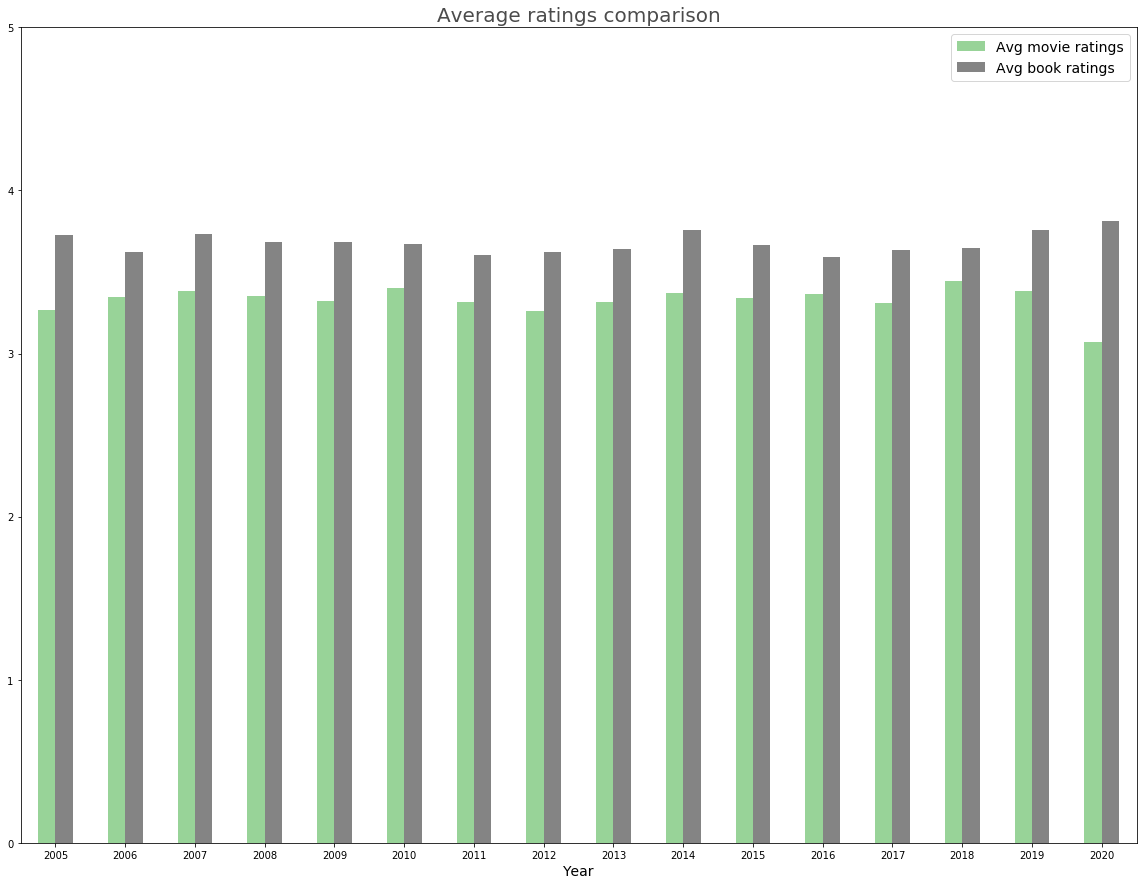

In [324]:
fig, ax = subplots()
pd_gb_ratings.plot.bar(rot = 0, ax=ax, figsize = (20, 15), colormap = 'Accent', alpha = 0.8)
ax.set_title('Average ratings comparison',fontsize=20, color= 'k', alpha = 0.7)
ax.set_xlabel("Year",fontsize=14)
ax.set_ylim(0.0, 5.0)
ax.legend(['Avg movie ratings', 'Avg book ratings'], fontsize=14);

In [228]:
pd_movies = spark.sql("select movie_id, year from movies_and_ratings where year >= 2005 and year <=2020").toPandas()

In [229]:
pd_gp_movies = pd_movies.groupby('year').count()

In [230]:
pd_gp_movies['movie_id'] = pd_gp_movies['movie_id'] / 12

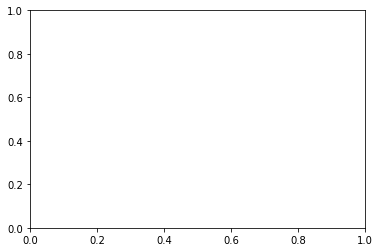

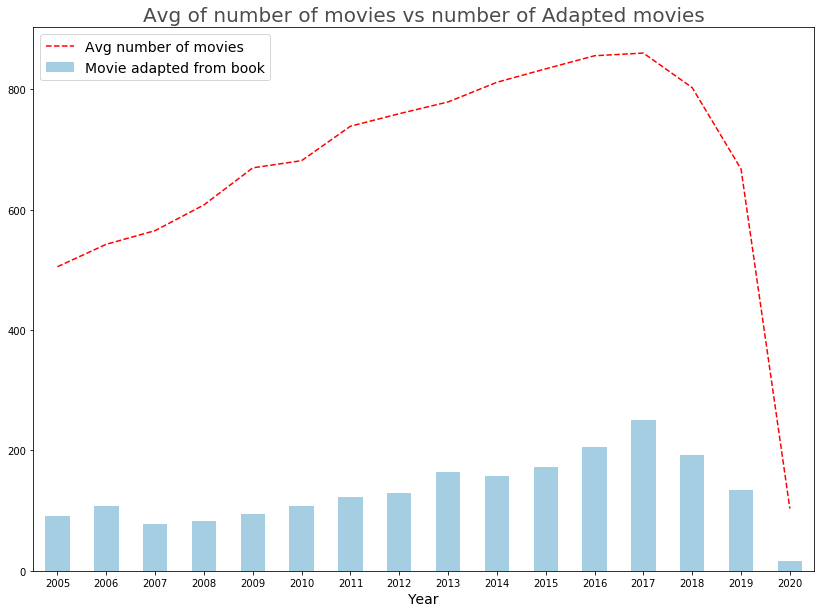

In [326]:
fig, ax = subplots()
ax = pd_gp_movies.plot(kind='line',linestyle='--',c = 'red')
pd_gb_count.plot.bar(rot = 0,ax=ax, figsize = (14, 10), colormap='Paired')
ax.set_title('Avg of number of movies vs number of Adapted movies',fontsize=20, color= 'k', alpha = 0.7)
ax.set_xlabel("Year",fontsize=14)
ax.legend(['Avg number of movies','Movie adapted from book'], fontsize=14)

In [173]:
df_test =spark.sql("select tconst, startYear from movies where startYear >= 2010 and startYear <=2020").toPandas()

In [175]:
df_gb_test = df_test.groupby('startYear').count()

In [176]:
df_gb_test

,tconst
startYear,
2010,15005
2011,16288
2012,17370
2013,18070
2014,19099
2015,20131
2016,21402
2017,21435
2018,20481


In [428]:
pd_gb_count_genres = pd_movie_book.groupby(['Movie_year','Genre']).count()[['Movie']]

Text(0.5,0,'Year')

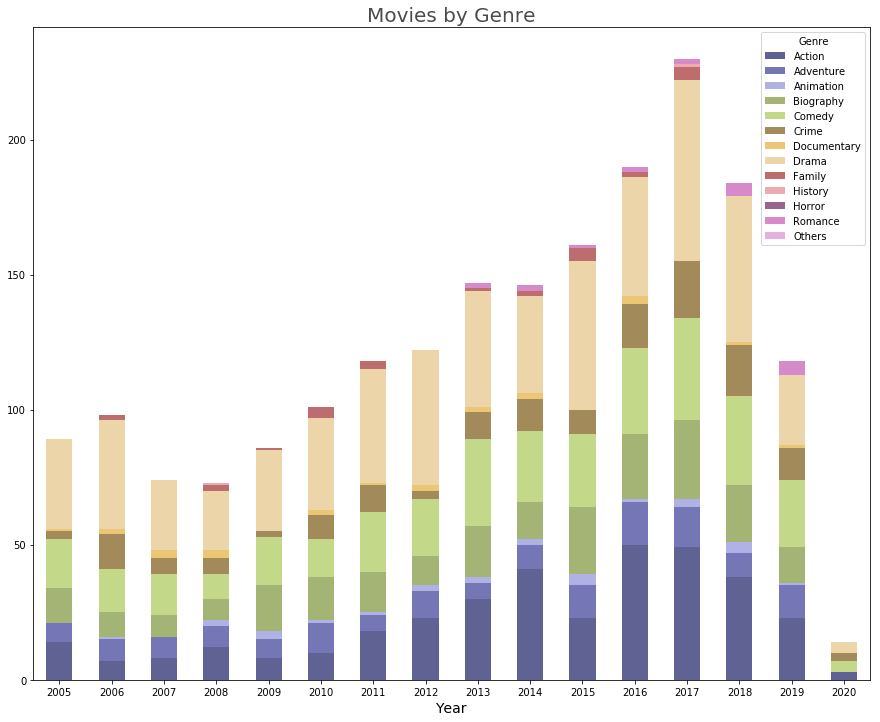

In [431]:
pivot_df = pd_gb_count_genres.reset_index().pivot(index='Movie_year', columns='Genre', values='Movie')
pivot_df.fillna(0)
fig, ax = subplots()
pivot_df.loc[:,['Action','Adventure', 'Animation','Biography','Comedy','Crime','Documentary','Drama','Family','History','Horror','Romance','Others']].plot.bar(rot = 0,stacked=True,colormap='tab20b', figsize=(15,12), ax=ax, alpha = 0.8)
ax.set_title('Movies by Genre',fontsize=20, color= 'k', alpha = 0.7)
ax.set_xlabel("Year",fontsize=14)


In [329]:
# Using welch test - t-test to calculate pvalue for Movie and Books avg ratings
# def welch_test(sampleA, sampleB):
#     numerator = np.mean(sampleA) - np.mean(sampleB)
#     denominator_sq = (np.var(sampleA) / len(sampleA)) + (np.var(sampleB) / len(sampleB))
#     return numerator / np.sqrt(denominator_sq)

In [352]:
pd_movies_hyt = pd_movie_book.groupby('Movie_year').agg({'Movie':'count', 'Book_ratings':['mean', 'var'],'normalize_movie_ratings':['var', 'mean']})

In [368]:
pd_movies_hyt['numerator'] = (pd_movies_hyt['Book_ratings']['mean'] - pd_movies_hyt['normalize_movie_ratings']['mean'])

In [370]:
pd_movies_hyt['denominator'] = np.sqrt((pd_movies_hyt['Book_ratings']['var']/pd_movies_hyt['Movie']['count'])+(pd_movies_hyt['normalize_movie_ratings']['var']/pd_movies_hyt['Movie']['count']))

In [372]:
pd_movies_hyt['test_statistic'] = pd_movies_hyt['numerator']/pd_movies_hyt['denominator']

In [402]:
# df = (
#         ((np.var(sample_1)/ss1 + np.var(sample_2)/ss2)**(2.0)) / 
#         ((np.var(sample_1)/ss1)**(2.0)/(ss1 - 1) + (np.var(sample_2)/ss2)**(2.0)/(ss2 - 1))
#     )
pd_movies_hyt['df_numerator'] = (pd_movies_hyt['Book_ratings']['var']/pd_movies_hyt['Movie']['count'] + pd_movies_hyt['normalize_movie_ratings']['var']/pd_movies_hyt['Movie']['count'])**(2.0)

In [403]:
pd_movies_hyt['df_denominator'] = (pd_movies_hyt['Book_ratings']['var']/pd_movies_hyt['Movie']['count'])**(2.0)/(pd_movies_hyt['Movie']['count']-1) + (pd_movies_hyt['normalize_movie_ratings']['var']/pd_movies_hyt['Movie']['count'])**(2.0)/(pd_movies_hyt['Movie']['count']-1)

In [404]:
pd_movies_hyt['df'] = pd_movies_hyt['df_numerator'] / pd_movies_hyt['df_denominator']

In [416]:
import scipy as sp
import scipy.stats as stats
import matplotlib.pyplot as plt


In [419]:
# p_value = students.cdf(test_statistic) + (1 - students.cdf(-test_statistic))

pd_movies_hyt['p_value'] = 1- stats.t(pd_movies_hyt['df']).cdf(pd_movies_hyt['test_statistic'])

In [422]:
pd_movies_hyt.round(6)

Book_ratings           Movie normalize_movie_ratings            \
                   mean       var count                     var      mean   
Movie_year                                                                  
2005           3.728132  0.621609    91                0.306542  3.264659   
2006           3.622710  1.017595   107                0.228522  3.346505   
2007           3.733077  0.558050    78                0.224912  3.383846   
2008           3.683293  0.857057    82                0.175316  3.355902   
2009           3.684149  0.910405    94                0.319022  3.323319   
2010           3.670741  0.977089   108                0.225784  3.404593   
2011           3.602295  0.825015   122                0.208495  3.315377   
2012           3.625659  1.222662   129                0.252254  3.259783   
2013           3.638598  0.993489   164                0.162983  3.316195   
2014           3.758861  0.592952   158                0.218336  3.368380   
2015           3.663757  0.892234   173                0.169733  3.340717   
2016           3.589415  0.974681   205                0.130424  3.365132   
2017           3.633880  0.986977   250                0.184811  3.310752   
2018           3.645938  1.042829   192                0.164900  3.441896   
2019           3.756296  0.806385   135                0.246779  3.381452   
2020           3.810588  0.113481    17                0.365634  3.069176   

             p_value numerator denominator test_statistic df_numerator  \
                                                                         
Movie_year                                                               
2005        0.000000  0.680788    0.100992       6.740985     0.000104   
2006        0.000001  0.525553    0.107916       4.869996     0.000136   
2007        0.000000  0.590958    0.100190       5.898387     0.000101   
2008        0.000001  0.572180    0.112205       5.099428     0.000159   
2009        0.000000  0.600691    0.114364       5.252471     0.000171   
2010        0.000001  0.515895    0.105535       4.888367     0.000124   
2011        0.000000  0.535647    0.092040       5.819712     0.000072   
2012        0.000000  0.604877    0.106927       5.656896     0.000131   
2013        0.000000  0.567805    0.083974       6.761663     0.000050   
2014        0.000000  0.624885    0.071657       8.720497     0.000026   
2015        0.000000  0.568366    0.078349       7.254309     0.000038   
2016        0.000000  0.473585    0.073422       6.450202     0.000029   
2017        0.000000  0.568443    0.068463       8.302956     0.000022   
2018        0.000000  0.451710    0.079311       5.695414     0.000040   
2019        0.000000  0.612245    0.088324       6.931776     0.000061   
2020        0.000013  0.861053    0.167879       5.129022     0.000794   

           df_denominator          df  \
                                        
Movie_year                              
2005             0.000001  161.401635   
2006             0.000001  151.323302   
2007             0.000001  130.393814   
2008             0.000001  112.807160   
2009             0.000001  151.049663   
2010             0.000001  153.943975   
2011             0.000000  178.486149   
2012             0.000001  178.660245   
2013             0.000000  215.078947   
2014             0.000000  258.815847   
2015             0.000000  235.154756   
2016             0.000000  257.634846   
2017             0.000000  339.091388   
2018             0.000000  249.930998   
2019             0.000000  208.992899   
2020             0.000032   25.059122   

                                                    student_T  
                                                               
Movie_year                                                     
2005        <scipy.stats._distn_infrastructure.rv_frozen o...  
2006        <scipy.stats._distn_infrastructure.rv_frozen o...  
2007        <scipy.stats._distn_infrastr